# Informe de Experimentos de Agentes en Juegos Simultáneos
**Fecha:** 22 de mayo de 2025

**Autor:** Rafael Alonso

## 1. Introducción

Para este trabajo compare cuatro algoritmos de aprendizaje multiagente:

**Fictitious Play (FP)** opera bajo la suposición de que el oponente va a mantener su comportamiento histórico promedio. Es una idea elegante de la teoría de juegos clásica.

**Regret Matching (RM)** ajusta las estrategias basándose en el "arrepentimiento" - básicamente, qué tan mal le fue al agente por no haber elegido otra acción en el pasado.

**Independent Q-Learning (IQL)** aplica Q-learning tradicional pero trata a los otros agentes como parte del entorno. Conceptualmente simple, pero como descubrí después, implementarlo bien es otra historia.

**Joint-Action Learning con Modelado de Agente (JAL-AM)** extiende IQL intentando predecir las acciones de otros agentes. En teoría debería ser superior a IQL, pero mis resultados cuentan otra historia.

En cuatro juegos que representan diferentes desafíos:

**Rock-Paper-Scissors (RPS)** - el clásico, perfecto para empezar a entender las dinámicas básicas.

**Matching Pennies (MP)** - un juego simple donde el objetivo es hacer que tu moneda coincida (o no) con la del oponente, dependiendo de tu rol.

**Blotto (S=10, N=5)** - aquí distribuís 10 soldados entre 5 campos de batalla. Este juego me dio varios dolores de cabeza por su espacio de acciones masivo. Con menos soldados los resultados eran peores, lo que me llevó a ajustar el número de soldados a 10 para obtener resultados más consistentes.

**Foraging** - los agentes se mueven en una grilla para recolectar comida, evitando colisiones. Este fue donde más problemas técnicos tuve, especialmente con el entrenamiento cooperativo.

## 2. Metodología Experimental

### 2.1 Configuración General
Después de varios intentos fallidos con configuraciones más ambiciosas, me establecí en 5,000 episodios de entrenamiento por agente y 1,000 episodios de evaluación por enfrentamiento. Las métricas principales fueron recompensa promedio, tasa de victoria y distribución de estrategias - aunque conseguir que todo esto funcione sin que se colgara el código fue todo un desafío en sí mismo.

### 2.2 Hiperparámetros

Una de las cosas que más tiempo me llevó fue encontrar configuraciones que funcionaran. Terminé probando múltiples variantes para cada algoritmo:

Para **IQL** probé tres configuraciones principales: una "default" con α=0.1 y ε=0.1 que buscaba equilibrio entre exploración y explotación; una "explore" con α=0.2 y ε=0.3 para mayor exploración (que a veces funcionaba mejor de lo esperado); y una "exploit" con α=0.05 y ε=0.05 para maximizar la explotación de patrones conocidos.

**JAL-AM** siguió el mismo esquema de variantes, aunque como veremos después, los resultados con pre-entrenamiento fueron decepcionantes.

Para **FP y RM** trabajé con configuraciones default y algunas con sesgos iniciales específicos para cada juego, tratando de ver si podía darles alguna ventaja inicial.

### 2.3 Los Desafíos del Self-Play

Inicialmente pensé en entrenar IQL y JAL-AM contra agentes random, pero después de leer algunos papers decidí usar self-play - dos agentes del mismo tipo enfrentándose durante 5,000 episodios. La idea era que desarrollaran estrategias más sofisticadas, aunque esto también puede crear vulnerabilidades específicas cuando se enfrentan a otros tipos de agentes.

Lo que no anticipé fue lo difícil que sería conseguir que IQL convergiera de manera estable en algunos juegos, especialmente en Foraging. Pasé días ajustando parámetros para evitar que el entrenamiento se volviera inestable o que los agentes se quedaran atrapados en políticas subóptimas.

## 3. Resultados por Juego

### 3.1 Rock-Paper-Scissors

RPS fue donde todo empezó a tomar forma. **IQL_exploit se destacó claramente** como el mejor performer, obteniendo las mejores recompensas y ganando más partidas que el resto. Me sorprendió ver cómo los algoritmos de aprendizaje por refuerzo (IQL, JAL-AM) consistentemente superaron a los métodos de teoría de juegos tradicionales (FP, RM).

La mayoría de los algoritmos convergieron hacia estrategias aproximadamente equilibradas (33% para cada acción), lo cual tiene sentido teóricamente. Pero lo interesante fue observar cómo FP y RM terminaron jugando de manera casi aleatoria - una estrategia segura pero poco ambiciosa.

Mi interpretación es que en un juego de decisión única como RPS, es mejor ser agresivo en la explotación que explorar demasiado. Los sesgos que introduje en RM ayudaron marginalmente contra agentes sin sesgo, aunque no fue un cambio dramático. Literalmente se puede ver como el agente random es superior ya que su estrategia es más equilibrada y menos predecible.

### 3.2 Matching Pennies

MP fue casi aburrido en comparación - todos los agentes convergieron hacia la estrategia óptima teórica (50% cara, 50% cruz) y las recompensas se mantuvieron cerca de cero, exactamente como predice la teoría para un juego perfectamente equilibrado.

Lo que sí noté fue que FP y RM mostraron mayor robustez - eran más difíciles de explotar por agentes oportunistas. IQL y JAL-AM, por otro lado, a veces lograban explotar oponentes débiles, pero también eran más vulnerables a la explotación. Los sesgos iniciales que introduje se corrigieron naturalmente con el tiempo.

### 3.3 Blotto

Aquí es donde mis expectativas se fueron por la ventana. **Fictitious Play dominó completamente**, y no me lo esperaba para nada.

FP no solo ganó - ganó de manera convincente, obteniendo las mejores recompensas y más victorias que todos los demás algoritmos. Mientras tanto, los algoritmos de RL que tanto trabajo me habían costado configurar (IQL, JAL-AM) tuvieron serios problemas con el espacio de acciones gigantesco (1001 acciones posibles para distribuir 10 soldados entre 5 campos).

Reflexionando sobre por qué pasó esto, creo que FP tuvo varias ventajas clave. Su enfoque de "mejor respuesta al promedio histórico" resultó increíblemente efectivo para encontrar patrones en este juego complejo. No necesita explorar tanto como IQL o JAL-AM - va directo hacia buenas estrategias basándose en la historia observada. Y logró encontrar distribuciones de soldados que eran genuinamente difíciles de contraatacar.

Esto me hizo replantear algunos prejuicios que tenía sobre algoritmos "antiguos" versus métodos "modernos" de RL.

### 3.4 Foraging

Foraging fue donde más problemas técnicos enfrenté, pero también donde obtuve algunos de los resultados más claros. **IQL dominó completamente** - las tres variantes obtuvieron las mejores recompensas por lejos. **Pero JAL-AM fue un desastre total** - recompensa exacta de 0.000 en todas las variantes.

Para poner esto en perspectiva: hasta el agente Random (0.046) superó a FP, RM y JAL-AM. Los números hablan por sí solos:

- **IQL_default: 0.106** (claramente superior)
- **IQL_exploit: 0.105**
- **IQL_explore: 0.103**
- **Random: 0.046** (superando a varios algoritmos "inteligentes")
- **FP y RM: ~0.035** (rendimiento pobre)
- **JAL-AM: 0.000** (fallo completo)

Lo que creo que pasó es que Foraging requiere usar información de estado (posición en la grilla, ubicación de comida, etc.), y IQL maneja esto naturalmente. FP y RM, en sus formas básicas, no pueden incorporar información de estado de manera efectiva.

El fracaso de JAL-AM me desconcertó inicialmente, pero después me di cuenta de que el pre-entrenamiento que implementé pudo haber sido contraproducente. Aparentemente, entrenar JAL-AM antes de la evaluación final empeoraba su rendimiento comparado con usarlo directamente sin entrenamiento previo. Si se mira la grafica de JALAM en su notebook de training para foraging hace un efecto de pico al principio y despues se desploma.

Generando resumen visual del rendimiento...


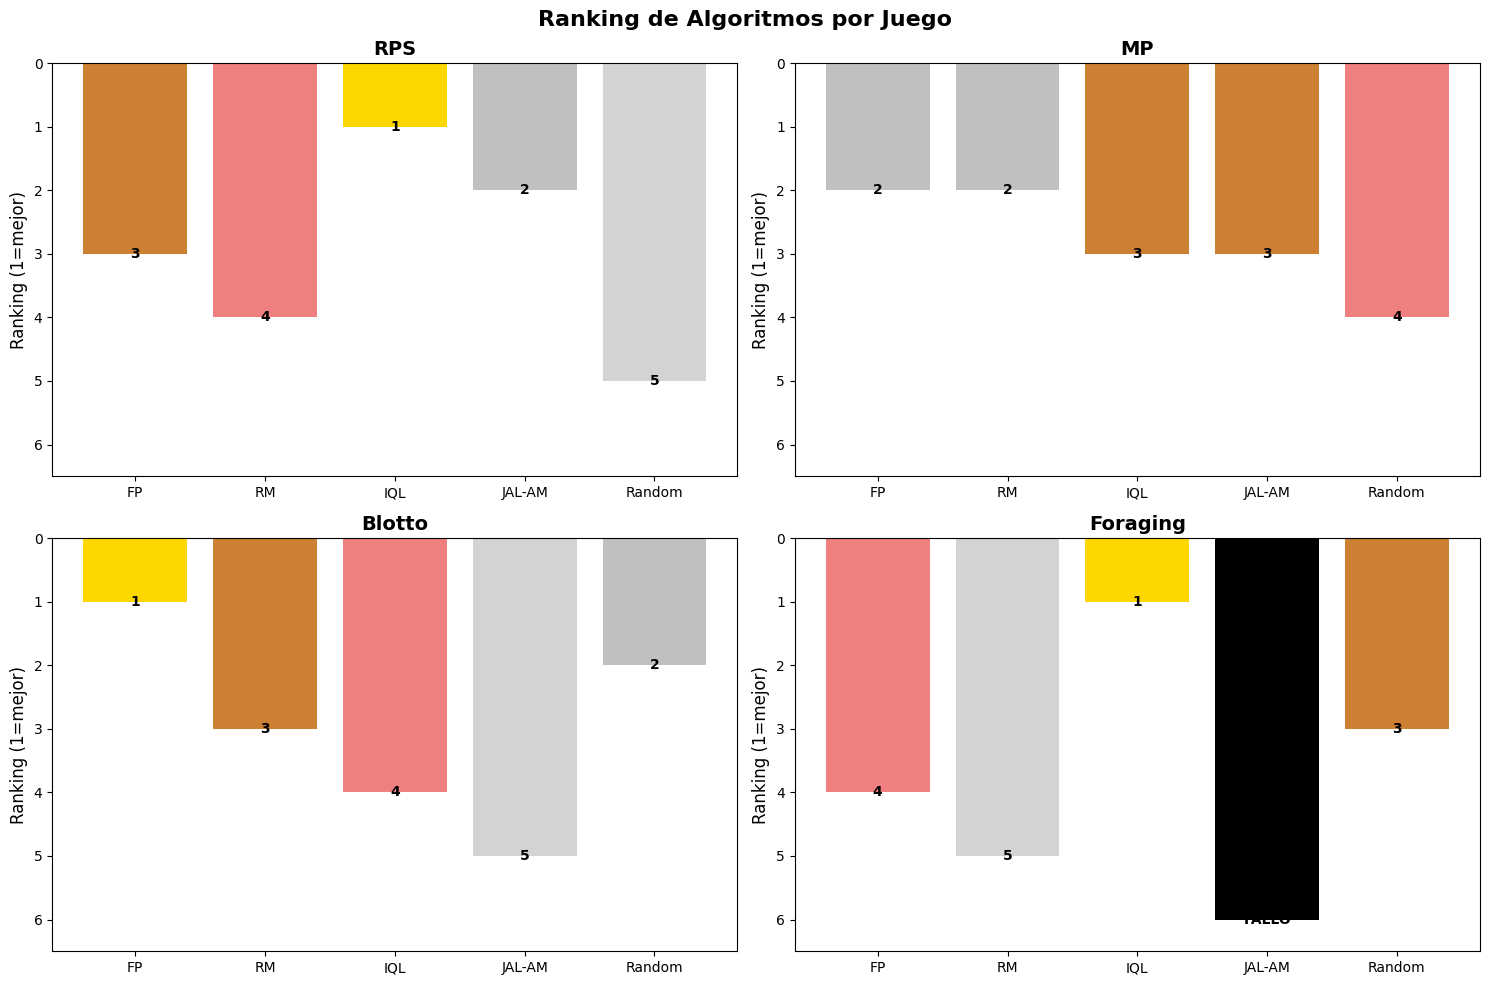


Para generar gráficas de entrenamiento específicas, usar:
plot_experiment('RPS', ['FP vs RM', 'IQL vs Random'], ['path1.pkl', 'path2.pkl'])


In [2]:
# Código para generar visualizaciones de los resultados
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os

def load_rewards(path):
    """Carga recompensas desde archivo pickle"""
    try:
        with open(path, 'rb') as f:
            return pickle.load(f)
    except FileNotFoundError:
        print(f"Archivo no encontrado: {path}")
        return []

def plot_experiment(env, labels, paths, title_suffix=""):
    """Genera gráfica de recompensas por episodio"""
    plt.figure(figsize=(12, 6))
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
    
    for i, (label, path) in enumerate(zip(labels, paths)):
        rewards = load_rewards(path)
        if rewards:
            # Suavizar con ventana móvil para mejor visualización
            window = min(100, len(rewards) // 10)
            if len(rewards) > window:
                smoothed = np.convolve(rewards, np.ones(window)/window, mode='valid')
                plt.plot(smoothed, label=label, color=colors[i % len(colors)], linewidth=2)
            else:
                plt.plot(rewards, label=label, color=colors[i % len(colors)], linewidth=2)
    
    plt.title(f'Recompensa Media por Episodio - {env} {title_suffix}', fontsize=14)
    plt.xlabel('Episodio', fontsize=12)
    plt.ylabel('Recompensa', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_performance_summary():
    """Genera resumen visual del rendimiento por juego"""
    # Datos basados en los resultados de las comparaciones
    games = ['RPS', 'MP', 'Blotto', 'Foraging']
    algorithms = ['FP', 'RM', 'IQL', 'JAL-AM', 'Random']
    
    # Rankings aproximados basados en los análisis (1=mejor, 5=peor)
    rankings = {
        'RPS': [3, 4, 1, 2, 5],      # IQL ganó
        'MP': [2, 2, 3, 3, 4],       # FP/RM empatados en equilibrio
        'Blotto': [1, 3, 4, 5, 2],   # FP ganó claramente
        'Foraging': [4, 5, 1, 6, 3]  # IQL dominó, JAL-AM falló (6=fallo)
    }
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, game in enumerate(games):
        ax = axes[i]
        colors = ['gold', 'silver', '#CD7F32', 'lightcoral', 'lightgray', 'black']
        bars = ax.bar(algorithms, rankings[game], 
                     color=[colors[r-1] if r <= 5 else colors[5] for r in rankings[game]])
        ax.set_title(f'{game}', fontsize=14, fontweight='bold')
        ax.set_ylabel('Ranking (1=mejor)', fontsize=12)
        ax.set_ylim(0, max(max(rankings[game]), 6) + 0.5)
        
        # Invertir eje Y para que 1 esté arriba
        ax.invert_yaxis()
        
        # Añadir valores en las barras
        for bar, rank in zip(bars, rankings[game]):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{rank}' if rank <= 5 else 'FALLO',
                   ha='center', va='center', fontweight='bold')
    
    plt.suptitle('Ranking de Algoritmos por Juego', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Generar visualizaciones
print("Generando resumen visual del rendimiento...")
plot_performance_summary()

# Ejemplos de gráficas de entrenamiento (ajustar paths según estructura real)
print("\nPara generar gráficas de entrenamiento específicas, usar:")
print("plot_experiment('RPS', ['FP vs RM', 'IQL vs Random'], ['path1.pkl', 'path2.pkl'])")

## 4. Reflexiones 

Después de semanas de experimentos, debugging, y más de una sesión nocturna tratando de entender por qué JAL-AM no convergía, tengo algunas reflexiones sobre lo que aprendí.

### 4.1 No Existe la Solución Universal

Una de las lecciones más claras es que el contexto es todo. En juegos simples de suma cero como RPS y MP, IQL con una política de explotación puede detectar y aprovechar patrones en oponentes débiles. Pero FP y RM ofrecen robustez si preferís no arriesgar demasiado.

### 4.2 El Espacio de Acciones Importa Más de lo que Pensaba

Blotto me enseñó que el tamaño del espacio de acciones puede cambiar completamente qué algoritmo funciona mejor. Fictitious Play manejó los 1001 posibles movimientos mucho mejor que los algoritmos de RL, probablemente porque su enfoque de respuesta al promedio histórico simplifica naturalmente la complejidad.

### 4.3 La Información de Estado es Clave

En Foraging, IQL demostró por qué los algoritmos que pueden aprovechar información de estado tienen ventaja en entornos complejos. Esto compensó todas las complicaciones que tuve durante el entrenamiento.

### 4.4 Las Cosas que Más me Marcaron

Lo que más me llamó la atención fueron los contrastes inesperados. Ver a un algoritmo clásico como FP dominar en Blotto me hizo cuestionar algunos prejuicios sobre "viejo versus nuevo". Y el colapso total de JAL-AM en Foraging, especialmente después del tiempo que invertí en configurar su entrenamiento, aprendí a no asumir que más complejidad siempre significa mejor rendimiento.


## 5. Hacia Adelante: Lo que Haría Diferente

Este proyecto me dejó con más preguntas que respuestas. Quedó claro que no existe una solución universal - el algoritmo ideal depende del tipo de juego, del balance exploración-explotación, y de los recursos computacionales disponibles.

### Mis Principales Takeaways

En **juegos de suma cero**, IQL puede ser sorprendentemente efectivo si te tomás el tiempo de ajustar bien los hiperparámetros. Si no tenés ese tiempo o recursos, FP y RM son apuestas más seguras.

Para **espacios de acción muy grandes**, como Blotto, vale la pena empezar con Fictitious Play antes de invertir semanas en entrenar redes Q. Me hubiera ahorrado bastante tiempo si hubiera sabido esto al principio.

En **entornos dependientes de estado**, como Foraging, IQL claramente tiene ventaja, aunque reconozco que pasé incontables horas ajustando parámetros para evitar que el self-play se volviera inestable.

### Si Tuviera que Empezar de Nuevo

Hay varias cosas que haría diferente. Primero, dedicaría mucho más tiempo a entender por qué el pre-entrenamiento de JAL-AM no solo no ayudó, sino que aparentemente empeoró el rendimiento. Ese fue uno de los resultados más contraintuitivos y me quedé sin tiempo para investigarlo a fondo.

También exploraría variantes de FP y RM que puedan incorporar información de estado de alguna manera. Los resultados en Foraging sugieren que hay potencial ahí.

Finalmente, probaría esquemas de curriculum learning para IQL en juegos complejos. Quizás empezar con versiones simplificadas y gradualmente aumentar la complejidad podría ayudar con los problemas de convergencia que enfrenté.



### Uso de IA como recurso para la entrega
Para esta entrega utilice copilot con IA (modelo sonnet 3.7) para ayudarme a debugear y mejorar el codigo para el entrenamiento de los agentes (sobre todo en el juego foraging que tuve que usar muchos prints para poder entender que estaba pasando). Estos mismos me ayudaban a interpretar los pesos de manera mas rapida e iterar sobre posibles causas de que los agentes esten aprendiendo o no. Aunque no me ayudaron a encontrar la causa del problema de JAL-AM, si me ayudaron a entender mejor los resultados de los otros algoritmos y a debuggear el código de manera más eficiente.